**Parameters offered by UNET trace**
1. Load {ld}- the load supplied to the simulator to determine how often a transmission should occur per second. Effectively frequency of communication 
2. Drop count {dC} - the number of packets dropped since warmup
3. Enqueue count {eC} - the number of packets queued since warmup (In vast majority of cases, this corresponds to Tx count)
4. SimLoad {sL} - the normalized  network load in the simulation
5. Mean delay {mD} - the mean delay between queuing and reception
6. Offered load {oL} - the normalized offered network load (In vast majority of cases, this corresponds to Load)
7. Rx count {rx} - the number of packets received since warmup
8. Throughput {tp} - the normalized network throughput. Calculated as time nodes are busy received successful frames/time experienced by all nodes
   (As such, adding nodes who do not receive data decreases overall throughput, as these nodes expereience large durations receiving nothing)
9. Tx count {tx} - the number of packets sent since warmup
10. Loss {ls} - drop count/ tx count



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum, auto


In [2]:
class Mac(Enum):
    ALOHA = 0
    CSMA = auto()
    SFAMA = auto()
    
    
class Scenario(Enum):
    BaseGridScenario = 0
    OffsetGridScenario = auto()
    HighQuantityScenario = auto()
    LowQuantityScenario = auto()
    ClusterScenario = auto()
    
    
class Column(Enum):
    Load = 0
    DropCount = auto()
    EnqueCount = auto()
    SimLoad = auto()
    MeanDelay = auto()
    OfferedLoad = auto()
    RxCount = auto()
    Throughput = auto()
    TxCount = auto()
    Loss = auto()

print(list(Mac))
print(list(Scenario))

col_names = [c.name for c in Column]


[<Mac.ALOHA: 0>, <Mac.CSMA: 1>, <Mac.SFAMA: 2>]
[<Scenario.BaseGridScenario: 0>, <Scenario.OffsetGridScenario: 1>, <Scenario.HighQuantityScenario: 2>, <Scenario.LowQuantityScenario: 3>, <Scenario.ClusterScenario: 4>]


In [17]:
results = []
for m in Mac:
    l = []
    for s in Scenario:
        name = m.name + "_" + s.name
        
        print(m,s)
        try:
            r = pd.read_csv('results/' + name + '.csv',names=col_names, header=0)
            # print(len(r))
            l.append(r)
        except:
            print(f"File {name} does not exist")
        
    results.append(l)




Mac.ALOHA Scenario.BaseGridScenario
Mac.ALOHA Scenario.OffsetGridScenario
Mac.ALOHA Scenario.HighQuantityScenario
Mac.ALOHA Scenario.LowQuantityScenario
Mac.ALOHA Scenario.ClusterScenario
Mac.CSMA Scenario.BaseGridScenario
Mac.CSMA Scenario.OffsetGridScenario
Mac.CSMA Scenario.HighQuantityScenario
Mac.CSMA Scenario.LowQuantityScenario
Mac.CSMA Scenario.ClusterScenario
Mac.SFAMA Scenario.BaseGridScenario
Mac.SFAMA Scenario.OffsetGridScenario
Mac.SFAMA Scenario.HighQuantityScenario
Mac.SFAMA Scenario.LowQuantityScenario
Mac.SFAMA Scenario.ClusterScenario


In [4]:
print(results[Mac.ALOHA.value][Scenario.BaseGridScenario.value])

   Load  DropCount  EnqueCount  SimLoad  MeanDelay  OfferedLoad  RxCount  \
0   0.1      199.0       769.0    0.090      0.439        0.090    570.0   
1   0.2      659.0      1385.0    0.161      0.446        0.162    725.0   
2   0.3     1085.0      1839.0    0.214      0.428        0.215    754.0   
3   0.4     1629.0      2364.0    0.275      0.441        0.276    735.0   
4   0.5     1932.0      2671.0    0.311      0.436        0.312    737.0   
5   0.6     2399.0      3132.0    0.363      0.429        0.365    733.0   
6   0.7     2763.0      3422.0    0.397      0.419        0.399    657.0   
7   0.8     3044.0      3675.0    0.425      0.435        0.429    631.0   
8   0.9     3267.0      3865.0    0.448      0.417        0.451    596.0   
9   1.0     3606.0      4170.0    0.484      0.427        0.487    564.0   

   Throughput  TxCount   Loss  
0       0.067    768.0  0.259  
1       0.085   1380.0  0.478  
2       0.088   1832.0  0.592  
3       0.086   2358.0  0.691  
4  

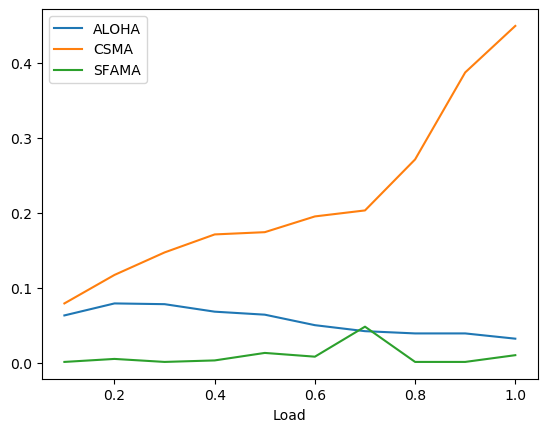

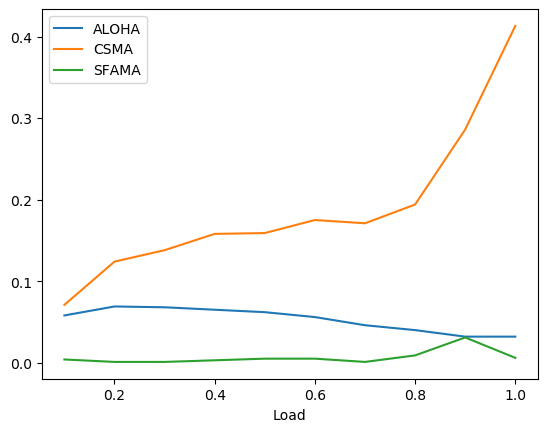

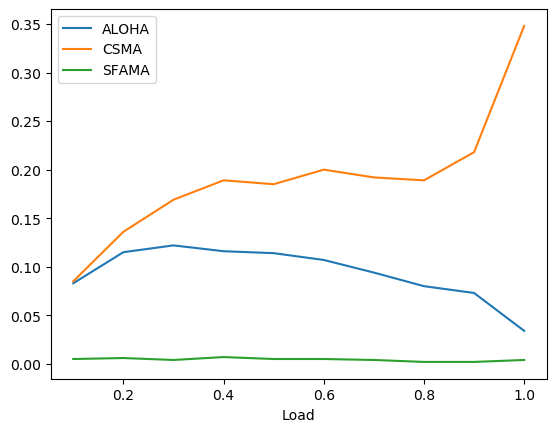

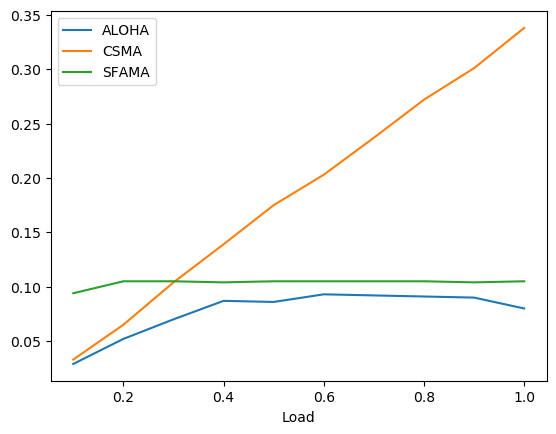

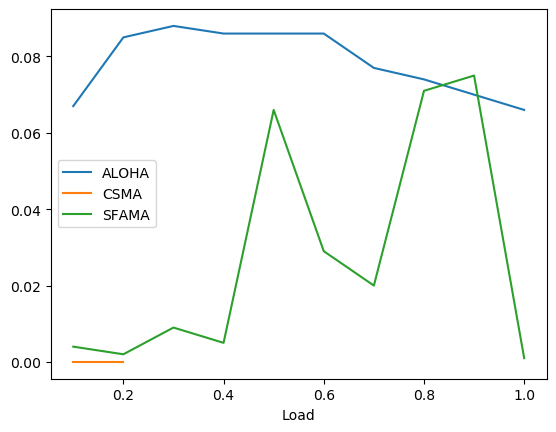

In [20]:
axes = []
for s in Scenario:
    axes.append(results[Mac.ALOHA.value][s.value].plot(x=Column.Load.name, y=Column.Throughput.name))
    ax = axes[-1]
    results[Mac.CSMA.value][s.value].plot(ax=ax,x=Column.Load.name, y=Column.Throughput.name)
    results[Mac.SFAMA.value][s.value].plot(ax=ax,x=Column.Load.name, y=Column.Throughput.name)
    ax.legend([Mac.ALOHA.name, Mac.CSMA.name, Mac.SFAMA.name])
